In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
%matplotlib inline
sb.set_style("whitegrid")

In [6]:
test_set = pd.read_csv('test_set.txt')

In [7]:
test_set.head()

,prot_id,zinc_id,model_type_name,desolv_apol,desolv_pol,net_charge,mwt,logp,hbd,hba,rb,smiles
0,304066369,ZINC000019364242,ref,5.17,-186.38,-3,292.244,-2.071,1,9,11,O=C([O-])CN(CC[NH+](CC(=O)[O-])CC(=O)[O-])CC(=...
1,304074137,ZINC000022589819,ref,3.94,-171.94,-3,292.244,-1.979,2,9,11,O=C([O-])C[C@@H](NCC[NH2+][C@H](CC(=O)[O-])C(=...
2,304074248,ZINC000023377883,ref,3.91,-171.67,-3,292.244,-1.979,2,9,11,O=C([O-])C[C@H](NCC[NH2+][C@H](CC(=O)[O-])C(=O...
3,304082183,ZINC000022040791,ref,4.03,-171.82,-3,292.244,-1.979,2,9,11,O=C([O-])C[C@H](NCC[NH2+][C@@H](CC(=O)[O-])C(=...
4,372754079,ZINC000001530600,ref,-4.48,-58.20,-1,279.189,-1.662,3,8,6,Nc1ccn(C[C@@H](CO)OC[P@@](=O)([O-])O)c(=O)n1


In [8]:
dataset = test_set.drop(columns=['prot_id', 'model_type_name', 'smiles'])

In [9]:
dataset

,zinc_id,desolv_apol,desolv_pol,net_charge,mwt,logp,hbd,hba,rb
0,ZINC000019364242,5.17,-186.38,-3,292.244,-2.071,1,9,11
1,ZINC000022589819,3.94,-171.94,-3,292.244,-1.979,2,9,11
2,ZINC000023377883,3.91,-171.67,-3,292.244,-1.979,2,9,11
3,ZINC000022040791,4.03,-171.82,-3,292.244,-1.979,2,9,11
4,ZINC000001530600,-4.48,-58.20,-1,279.189,-1.662,3,8,6
5,ZINC000001532183,0.26,-50.57,-1,289.188,-1.146,3,8,5
6,ZINC000001718508,3.96,-93.61,-2,273.201,-2.352,1,9,6
7,ZINC000019366122,-0.44,-205.10,-3,278.261,-2.163,2,8,11
8,ZINC000408525779,3.46,-69.39,0,269.301,-1.259,1,4,1
9,ZINC000408525781,3.59,-71.09,0,269.301,-1.259,1,4,1


In [10]:
scores = pd.read_csv('cypA_results.dat', sep=' ', names=['zinc_id', 'score'])
scores.head()

,zinc_id,score
0,ZINC000019364242,-5.6
1,ZINC000022589819,-5.5
2,ZINC000023377883,-5.6
3,ZINC000022040791,-5.8
4,ZINC000001530600,-6.1


In [11]:
analysis_set = pd.merge(dataset, scores)

In [12]:
analysis_set

,zinc_id,desolv_apol,desolv_pol,net_charge,mwt,logp,hbd,hba,rb,score
0,ZINC000019364242,5.17,-186.38,-3,292.244,-2.071,1,9,11,-5.6
1,ZINC000022589819,3.94,-171.94,-3,292.244,-1.979,2,9,11,-5.5
2,ZINC000023377883,3.91,-171.67,-3,292.244,-1.979,2,9,11,-5.6
3,ZINC000022040791,4.03,-171.82,-3,292.244,-1.979,2,9,11,-5.8
4,ZINC000001530600,-4.48,-58.20,-1,279.189,-1.662,3,8,6,-6.1
5,ZINC000001532183,0.26,-50.57,-1,289.188,-1.146,3,8,5,-6.2
6,ZINC000001718508,3.96,-93.61,-2,273.201,-2.352,1,9,6,-6.0
7,ZINC000019366122,-0.44,-205.10,-3,278.261,-2.163,2,8,11,-5.0
8,ZINC000408525779,3.46,-69.39,0,269.301,-1.259,1,4,1,-6.2
9,ZINC000408525781,3.59,-71.09,0,269.301,-1.259,1,4,1,-5.9


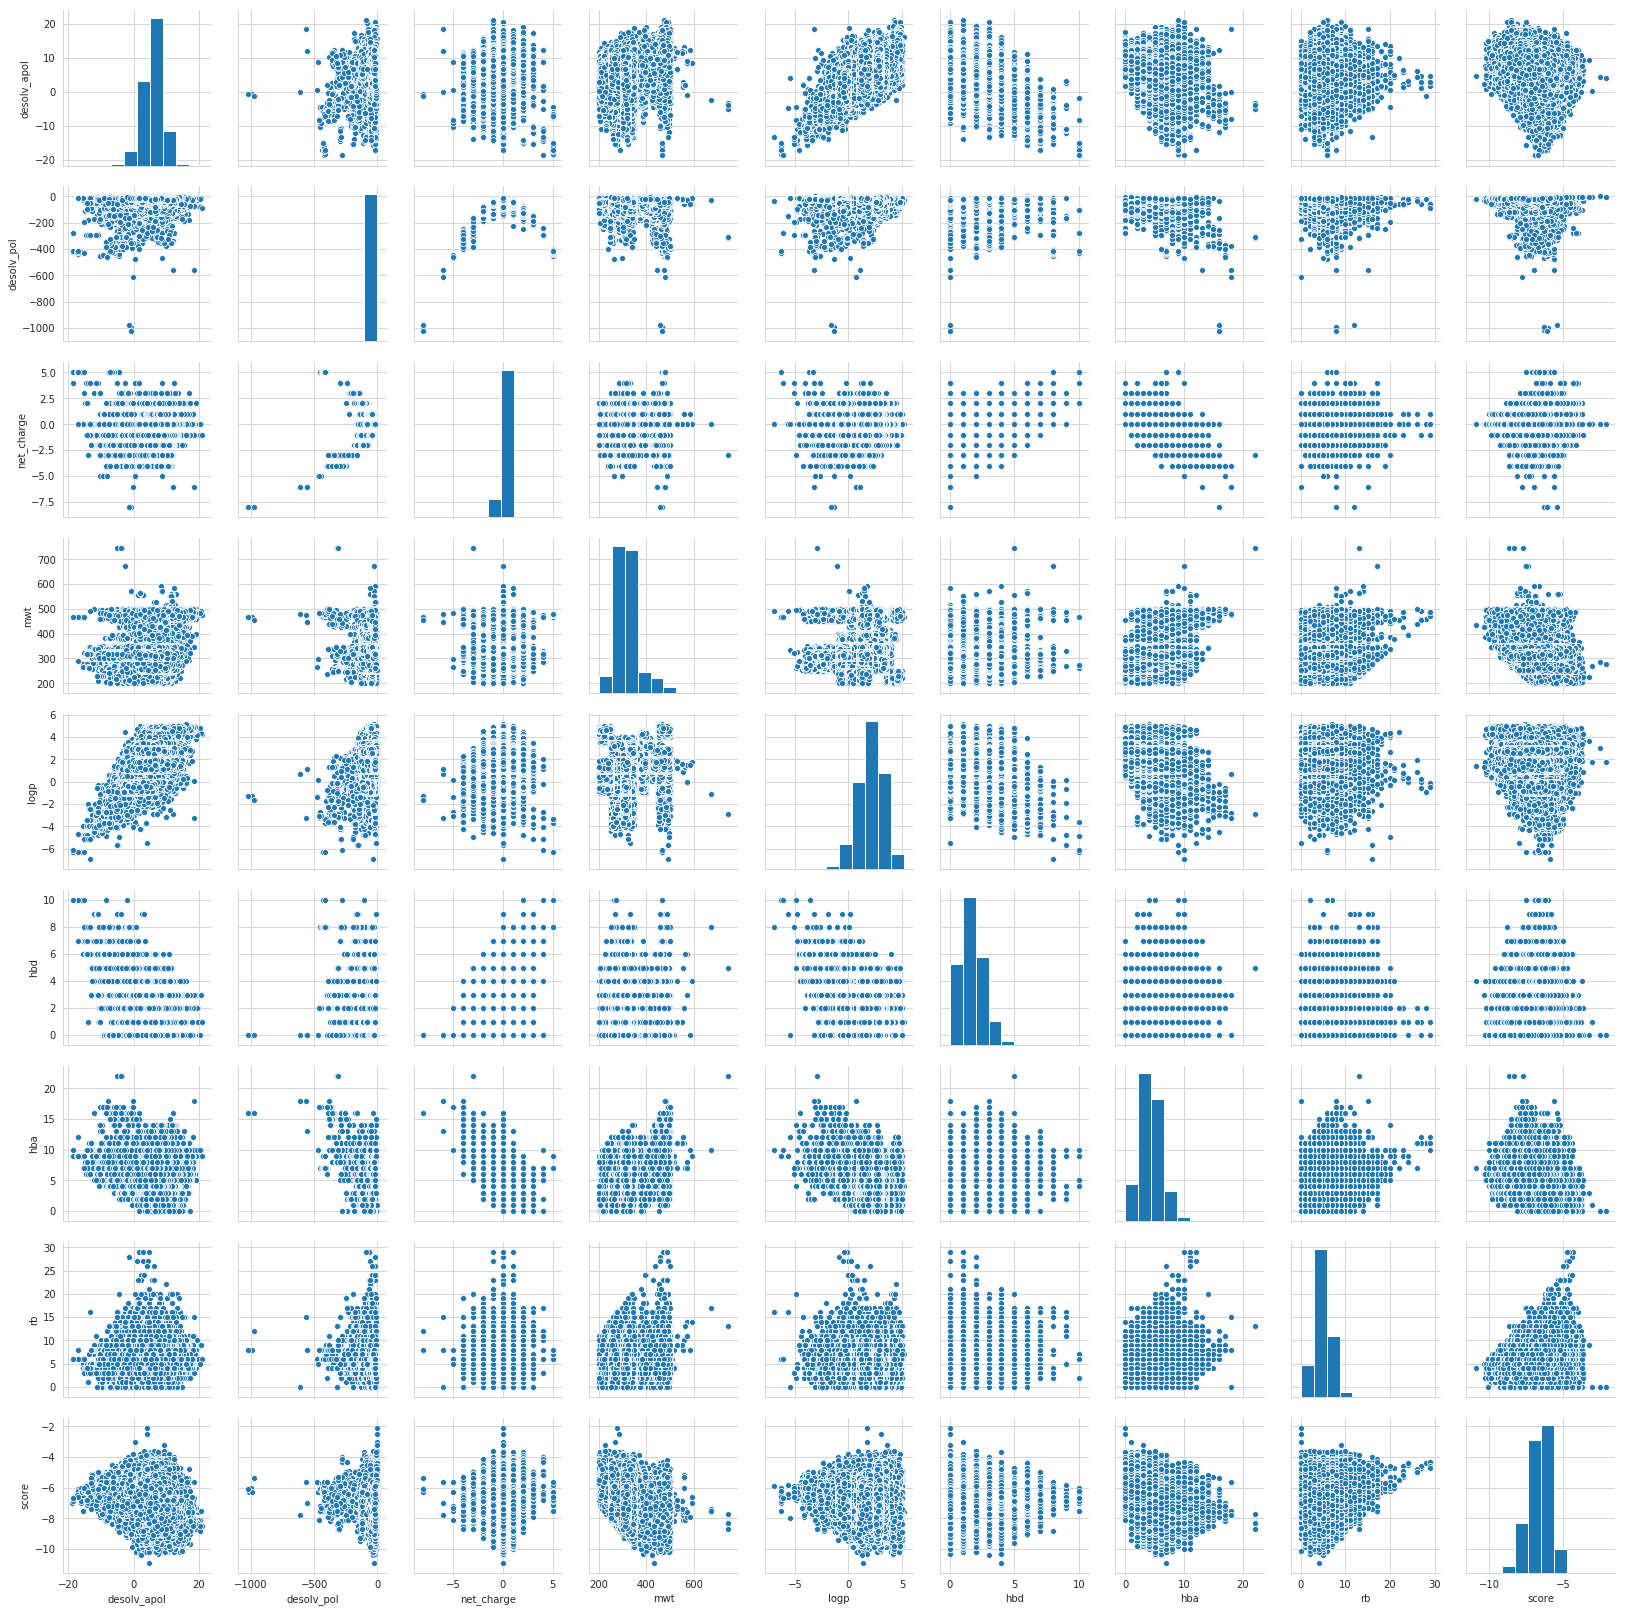

In [11]:
sb.pairplot(analysis_set.drop(columns=['zinc_id']))

In [18]:
analysis_set.tail()

,zinc_id,desolv_apol,desolv_pol,net_charge,mwt,logp,hbd,hba,rb,score
1383152,ZINC000096011444,3.37,-14.56,0,313.379,1.158,1,5,6,-5.9
1383153,ZINC000096007240,6.71,-30.62,0,300.727,1.625,0,6,4,-6.5
1383154,ZINC000045645477,6.56,-19.06,0,308.294,1.465,1,6,4,-6.6
1383155,ZINC000096008307,10.25,-24.93,0,323.675,1.608,0,8,4,-7.4
1383156,ZINC000096010742,1.57,-13.24,0,318.127,1.780,3,4,4,-6.4


In [31]:
target = np.array(analysis_set['score'])
target

array([-5.6, -5.5, -5.6, ..., -6.6, -7.4, -6.4])

In [32]:
descriptors = np.array(analysis_set[['desolv_apol', 'desolv_pol', 'net_charge', 'mwt', 'logp', 'hbd', 'hba', 'rb']])
descriptors

array([[   5.17, -186.38,   -3.  , ...,    1.  ,    9.  ,   11.  ],
       [   3.94, -171.94,   -3.  , ...,    2.  ,    9.  ,   11.  ],
       [   3.91, -171.67,   -3.  , ...,    2.  ,    9.  ,   11.  ],
       ...,
       [   6.56,  -19.06,    0.  , ...,    1.  ,    6.  ,    4.  ],
       [  10.25,  -24.93,    0.  , ...,    0.  ,    8.  ,    4.  ],
       [   1.57,  -13.24,    0.  , ...,    3.  ,    4.  ,    4.  ]])

# Random Forest Regression on Virtual Screening Dataset

In [37]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()

In [38]:
clf.fit(descriptors, target)

/u4/ashouaib/software/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [39]:
clf.n_features_

8

In [48]:
test_ligand = [[9.88, -37.77, 1, 352.502, 2.3115, 2, 2, 4]]

clf.predict(test_ligand)

array([-7.72])

In [28]:
analysis_set.tail()

,zinc_id,desolv_apol,desolv_pol,net_charge,mwt,logp,hbd,hba,rb,score
1383152,ZINC000096011444,3.37,-14.56,0,313.379,1.158,1,5,6,-5.9
1383153,ZINC000096007240,6.71,-30.62,0,300.727,1.625,0,6,4,-6.5
1383154,ZINC000045645477,6.56,-19.06,0,308.294,1.465,1,6,4,-6.6
1383155,ZINC000096008307,10.25,-24.93,0,323.675,1.608,0,8,4,-7.4
1383156,ZINC000096010742,1.57,-13.24,0,318.127,1.780,3,4,4,-6.4


In [42]:
clf.score(descriptors, target)

0.9358707932862023

In [47]:
another_test = [[8.64, -8.72, 0, 398.038, 3.8943, 0, 2, 3]]

clf.predict(another_test)

array([-6.03])

#  PCA on Virtual Screening Dataset

In [82]:
from sklearn.decomposition import PCA

In [62]:
pca = PCA(n_components=5)
pca.fit(descriptors)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [63]:
xp = pca.transform(descriptors)
xp.shape

(1383157, 5)

In [67]:
pca.explained_variance_ratio_

array([8.58192626e-01, 1.36617582e-01, 3.03183029e-03, 9.40197905e-04,
       7.60842287e-04])

In [65]:
comps = pd.DataFrame(pca.components_, columns=['desolv_apol', 'desolv_pol', 'net_charge', 'mwt', 'logp', 'hbd', 'hba', 'rb'])
comps

,desolv_apol,desolv_pol,net_charge,mwt,logp,hbd,hba,rb
0,0.017854,0.019441,-0.000197,0.999450,0.007350,0.000144,0.012643,0.013751
1,0.009113,-0.999604,0.003178,0.019262,-0.010092,0.007788,-0.005341,0.011651
2,-0.929994,-0.005189,-0.022536,0.015579,-0.275400,0.120096,0.206380,0.038371
3,0.033139,0.012802,0.058352,-0.013869,0.037328,0.148729,-0.062560,0.983724
4,0.222925,-0.002775,-0.180905,-0.015502,-0.169316,-0.269629,0.896914,0.107268


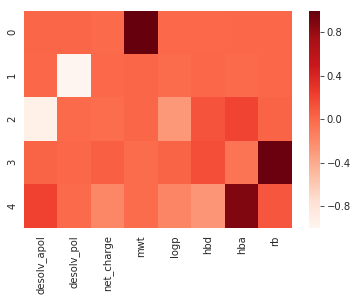

In [66]:
sb.heatmap(comps, cmap='Reds', annot=False)

# Now let us drop the desolv_apol and desolv_pol columns and redo PCA

In [83]:
test_data = np.array(analysis_set[['net_charge', 'mwt', 'logp', 'hbd', 'hba', 'rb']])
test_data

array([[ -3.   , 292.244,  -2.071,   1.   ,   9.   ,  11.   ],
       [ -3.   , 292.244,  -1.979,   2.   ,   9.   ,  11.   ],
       [ -3.   , 292.244,  -1.979,   2.   ,   9.   ,  11.   ],
       ...,
       [  0.   , 308.294,   1.465,   1.   ,   6.   ,   4.   ],
       [  0.   , 323.675,   1.608,   0.   ,   8.   ,   4.   ],
       [  0.   , 318.127,   1.78 ,   3.   ,   4.   ,   4.   ]])

In [84]:
pca = PCA(n_components=5)
pca.fit(test_data)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [94]:
xpp = pca.transform(test_data)
xpp.shape

(1383157, 5)

In [92]:
pca.explained_variance_ratio_

array([9.97027530e-01, 1.13563950e-03, 1.06758253e-03, 4.73326606e-04,
       1.96812988e-04])

In [87]:
comps2 = pd.DataFrame(pca.components_, columns=['net_charge', 'mwt', 'logp', 'hbd', 'hba', 'rb'])
comps2

,net_charge,mwt,logp,hbd,hba,rb
0,-0.000188,0.999798,0.007307,0.000175,0.012639,0.013792
1,0.003947,-0.015000,-0.200571,0.152193,0.294616,0.921721
2,-0.159546,-0.003153,-0.390367,-0.126016,0.834935,-0.330383
3,0.228299,0.010110,-0.654807,0.658096,-0.233349,-0.177379
4,0.056684,-0.007836,0.612758,0.692671,0.363251,-0.097513


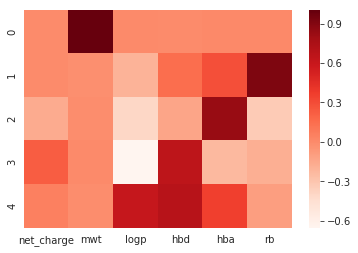

In [90]:
sb.heatmap(comps2, cmap='Reds', annot=False)

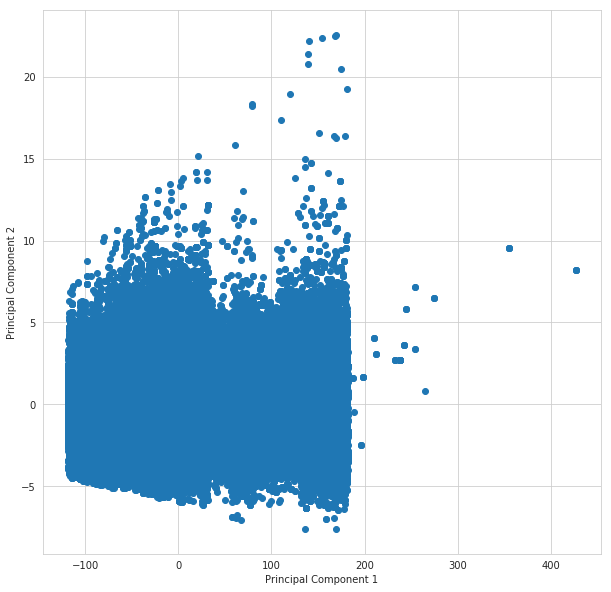

In [95]:
pc1 = xpp[:,0]
pc2 = xpp[:,1]

fig = plt.subplots(figsize=(10,10))
plt.scatter(pc1, pc2)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()